In [27]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# 读取数据
data = pd.read_csv(r'D:\MoE\mixture-of-experts\data\tukeynew2_cleaned.csv')
# 假设数据中有一个 'date' 列作为时间戳
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data = data[['EF_COD','1#TMP','2#TMP','3#TMP','4#TMP','5#TMP','6#TMP','7#TMP','8#TMP','9#TMP']]
# 数据归一化


In [28]:
values = data.values
print(values.shape)

(12220, 10)


In [32]:
# 定义测试集大小，例如最后10%的数据
# test_size = int(n_total * 0.1)
test_size = 1000
# 分割测试集
test = values[:test_size, :]
values = values[test_size:, :]  # 剩余的数据用于滚动交叉验证
n_total = values.shape[0]        # 更新总样本数

# 设置初始训练集大小和每次增加的大小
initial_train_size = int(n_total * 0.6)
expansion_size = int(n_total * 0.1)
validation_size = int(n_total * 0.1)

Statistics:
Mean, Std Dev, CV, Kurtosis, Skewness
Dataset 1: [16.18466459 11.58087146  0.71554597 -0.85459301  0.15373467]
Dataset 2: [18.782715   12.55944833  0.66867055 -1.4432236  -0.46080725]
t-statistic: -8.371513569035779, p-value: 8.680726685436273e-17


C:\Users\84211\AppData\Local\Temp\ipykernel_12856\2266691999.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data1, data2], labels=['Dataset 1', 'Dataset 2'])


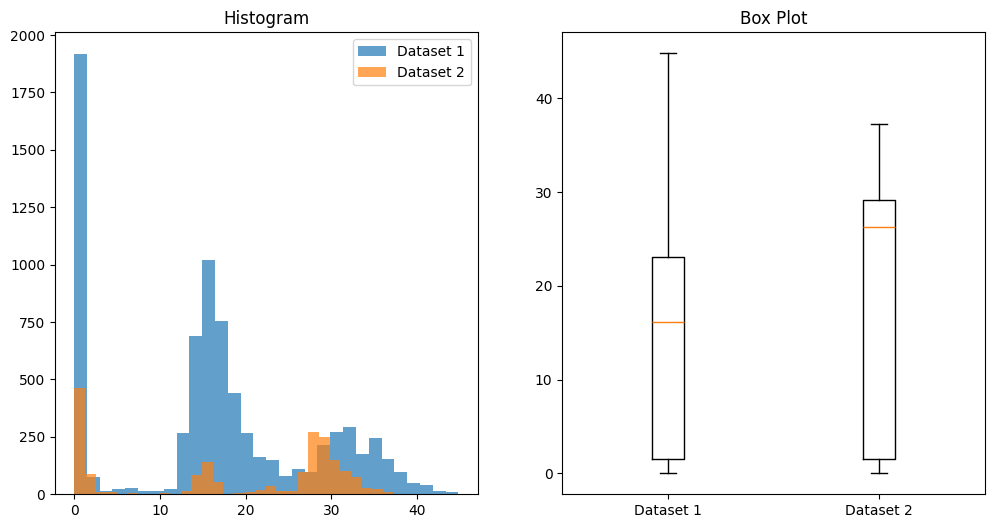

In [33]:
data1 = values[:,-1]
data2 = test[:,-1]
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew, ttest_ind

# 计算基本统计数据
mean1 = np.mean(data1)
std_dev1 = np.std(data1)
cv1 = std_dev1 / mean1 if mean1 != 0 else float('nan')  # 避免除以零
kurt1 = kurtosis(data1)
skew1 = skew(data1)

mean2 = np.mean(data2)
std_dev2 = np.std(data2)
cv2 = std_dev2 / mean2 if mean2 != 0 else float('nan')
kurt2 = kurtosis(data2)
skew2 = skew(data2)

stats = np.array([[mean1, std_dev1, cv1, kurt1, skew1],
                  [mean2, std_dev2, cv2, kurt2, skew2]])

# 将统计结果打印出来
print("Statistics:\nMean, Std Dev, CV, Kurtosis, Skewness")
print("Dataset 1:", stats[0, :])
print("Dataset 2:", stats[1, :])
# 进行t检验
t_stat, p_value = ttest_ind(data1, data2, equal_var=False)
print(f"t-statistic: {t_stat}, p-value: {p_value}")

# 绘制直方图比较数据集分布
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(data1, bins=30, alpha=0.7, label='Dataset 1')
plt.hist(data2, bins=30, alpha=0.7, label='Dataset 2')
plt.title('Histogram')
plt.legend()

# 绘制箱型图
plt.subplot(1, 2, 2)
plt.boxplot([data1, data2], labels=['Dataset 1', 'Dataset 2'])
plt.title('Box Plot')
plt.show()


Statistics:
Mean, Std Dev, CV, Kurtosis, Skewness
Dataset 1: [15.11999822 10.70411319  0.70794408 -0.34510646  0.41420999]
Dataset 2: [18.609265   12.71392089  0.68320382 -1.46770057 -0.30305486]
t-statistic: -11.277371140823075, p-value: 7.130392354895409e-29


C:\Users\84211\AppData\Local\Temp\ipykernel_12856\2972889849.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data1, data2], labels=['Dataset 1', 'Dataset 2'])


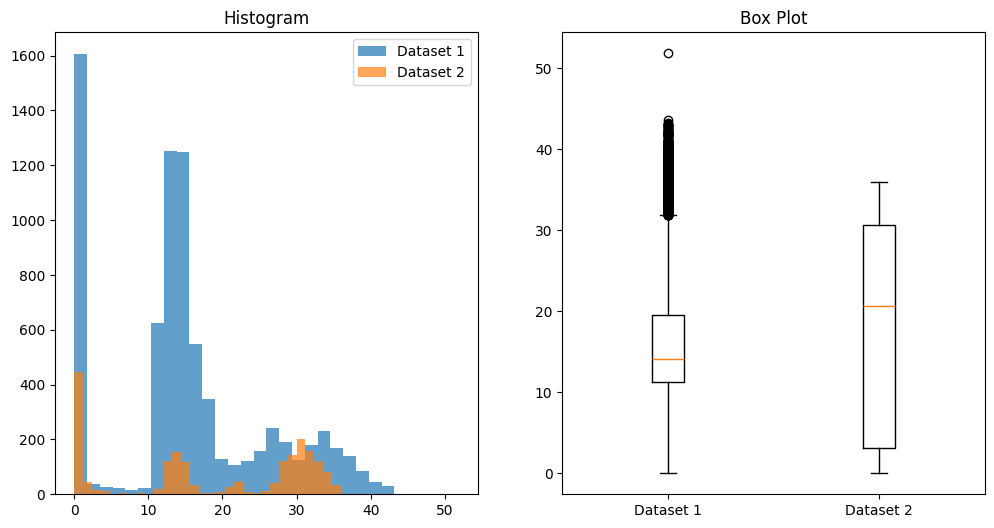

In [34]:
data1 = values[:,-2]
data2 = test[:,-2]
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew, ttest_ind

# 计算基本统计数据
mean1 = np.mean(data1)
std_dev1 = np.std(data1)
cv1 = std_dev1 / mean1 if mean1 != 0 else float('nan')  # 避免除以零
kurt1 = kurtosis(data1)
skew1 = skew(data1)

mean2 = np.mean(data2)
std_dev2 = np.std(data2)
cv2 = std_dev2 / mean2 if mean2 != 0 else float('nan')
kurt2 = kurtosis(data2)
skew2 = skew(data2)

stats = np.array([[mean1, std_dev1, cv1, kurt1, skew1],
                  [mean2, std_dev2, cv2, kurt2, skew2]])

# 将统计结果打印出来
print("Statistics:\nMean, Std Dev, CV, Kurtosis, Skewness")
print("Dataset 1:", stats[0, :])
print("Dataset 2:", stats[1, :])
# 进行t检验
t_stat, p_value = ttest_ind(data1, data2, equal_var=False)
print(f"t-statistic: {t_stat}, p-value: {p_value}")

# 绘制直方图比较数据集分布
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(data1, bins=30, alpha=0.7, label='Dataset 1')
plt.hist(data2, bins=30, alpha=0.7, label='Dataset 2')
plt.title('Histogram')
plt.legend()

# 绘制箱型图
plt.subplot(1, 2, 2)
plt.boxplot([data1, data2], labels=['Dataset 1', 'Dataset 2'])
plt.title('Box Plot')
plt.show()